In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data = pd.read_csv("marketing.csv")
data_new = pd.read_csv("marketing_new.csv")

In [22]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [23]:
data_new.head()

,Unnamed: 0,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW,channel_code,is_correct_lang
0,0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
1,1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
2,2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
3,3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes
4,4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaN,House Ads,True,0.0,1.0,Yes


In [24]:
data['is_retained'] = data['is_retained'].astype("bool")

In [25]:
channel_dict = {"House Ads": 1, 
                "Instagram": 2,
                "Facebook": 3,
                "Email": 4,
               "Push": 5}
data["channel_code"] = data["subscribing_channel"].map(channel_dict)

In [26]:
data = pd.read_csv('marketing.csv', parse_dates = ['date_served', 'date_subscribed', 'date_canceled'])
data['DoW'] = data['date_subscribed'].dt.dayofweek

In [27]:
data.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,0.0


In [28]:
#kaç kullanıcı günlük olarak reklamları görür
daily_users = data.groupby(["date_served"])["user_id"].nunique()
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


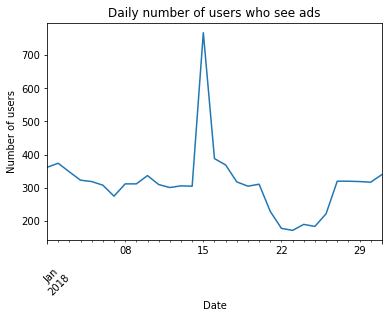

In [29]:
daily_users.plot()
plt.title("Daily number of users who see ads")
plt.xlabel("Date")
plt.ylabel("Number of users")
plt.xticks(rotation=45)
plt.show()

### <b>CONVERTION RATE</b>
>* Conversion rate; internet sitesini ziyaret eden tüm kişilerin, bu ziyaretlerde istenilen hedefi gerçekleştirmesinden elde edilen bir ölçümdür. 
> * Örneğin sitenin hedefi üyelik sayısını artırmak ise eğer tüm ziyaretçilerin kaçının siteye olduğu hesaplanır ve çıkan sonuç conversion rate olur.

<center><b>Conversion rate</b> = $\frac{Number  of  people  who  converted}{Total number of people we marketed to}$

In [30]:
subscribers = data[data["converted"] == True]["user_id"].nunique()

In [32]:
total = data["user_id"].nunique()
conversion_rate = subscribers / total

print(round(conversion_rate*100,2), "%")

13.89 %


### <b>RETENTION RATE</b> : 
> * Retention, kullanıcılarınızın uygulamanızı kaç gün boyunca telefonlarında tuttuklarını ve kullandıklarını gösteren orandır.
> * Retention, uygulamanızı ilk defa kullanan kullanıcıların belirli bir süre sonunda yüzde kaçının hala kullanmaya devam ettiğini gösteren orandır.

<center><b>Retention Rate</b> = $\frac{Number Of People Who Remain Subscribed}{Total Number Of People Who Converted}$

In [35]:
retained = data[data["is_retained"] == True]["user_id"].nunique()

subscribers = data[data["converted"] == True]["user_id"].nunique()
retention_rate = retained/subscribers

print(round(retention_rate*100,2), "%")

66.8 %


### CUSTOMER SEGMENTATION

In [40]:
house_ads = data[data["subscribing_channel"]=="House Ads"]
retained = house_ads[house_ads["is_retained"]==True]["user_id"].nunique()
subscribers = house_ads[house_ads["converted"]==True]["user_id"].nunique()

retention_rate = retained / subscribers
print(round(retention_rate*100,2), "%")

58.05 %


In [41]:
data["subscribing_channel"].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

### Segmenting using pandas-groupby()

In [42]:
retained = data[data["is_retained"]==True].groupby(["subscribing_channel"])["user_id"].nunique()
print(retained)

subscribing_channel
Email        141
Facebook     152
House Ads    173
Instagram    158
Push          54
Name: user_id, dtype: int64


In [50]:
subscribers = data[data["converted"] == True].groupby("subscribing_channel")["user_id"].nunique()
print(subscribers)

subscribing_channel
Email        161
Facebook     221
House Ads    298
Instagram    232
Push          77
Name: user_id, dtype: int64


### Segmenting Results

In [51]:
channel_retention_rate = (retained / subscribers)*100
print(channel_retention_rate)

subscribing_channel
Email        87.577640
Facebook     68.778281
House Ads    58.053691
Instagram    68.103448
Push         70.129870
Name: user_id, dtype: float64


In [52]:
total = data.groupby(['language_displayed'])['user_id'].nunique()
subscribers = data[data['converted'] == True].groupby(['language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.129167
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


In [53]:
total = data.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
subscribers = data[data['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = subscribers/total
print(daily_conversion_rate)

date_served
2018-01-01    0.099448
2018-01-02    0.098930
2018-01-03    0.103448
2018-01-04    0.108359
2018-01-05    0.125392
2018-01-06    0.113636
2018-01-07    0.141818
2018-01-08    0.115385
2018-01-09    0.125000
2018-01-10    0.118694
2018-01-11    0.080645
2018-01-12    0.076412
2018-01-13    0.084967
2018-01-14    0.085246
2018-01-15    0.113429
2018-01-16    0.255155
2018-01-17    0.219512
2018-01-18    0.091195
2018-01-19    0.059016
2018-01-20    0.067524
2018-01-21    0.087336
2018-01-22    0.123596
2018-01-23    0.122093
2018-01-24    0.115789
2018-01-25    0.125000
2018-01-26    0.090090
2018-01-27    0.065625
2018-01-28    0.062500
2018-01-29    0.059561
2018-01-30    0.066246
2018-01-31    0.052941
Name: user_id, dtype: float64


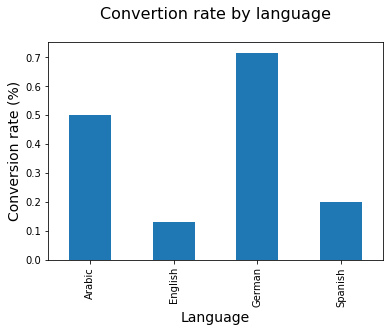

In [54]:
language_conversion_rate.plot(kind="bar")
plt.title("Convertion rate by language\n",size=16)
plt.xlabel("Language",size=14)
plt.ylabel("Conversion rate (%)", size=14)
plt.show()

In [57]:
total = data.groupby("date_subscribed")["user_id"].nunique()
retained = data[data["is_retained"]==True].groupby("date_subscribed")["user_id"].nunique()
daily_retention_rate = retained / total

In [58]:
daily_retention_rate = pd.DataFrame(daily_retention_rate.reset_index())
daily_retention_rate.columns = ["date_subscribed","retention_rate"]

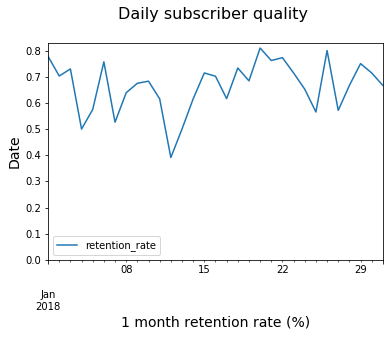

In [60]:
daily_retention_rate.plot("date_subscribed","retention_rate")
plt.title("Daily subscriber quality \n",size=16)
plt.xlabel("1 month retention rate (%)", size=14)
plt.ylabel("Date",size=14)
plt.ylim(0)
plt.show()

In [66]:
total = data.groupby(['date_served'])['user_id'].nunique()
subscribers = data[data['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate for all languages
daily_conversion_rate = subscribers/total

In [67]:
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index(0))

# Rename columns
daily_conversion_rate.columns = ['date_subscribed', 
                                 'conversion_rate']

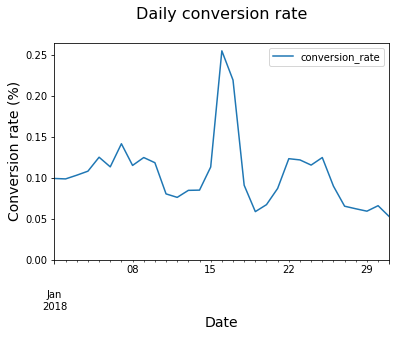

In [69]:
daily_conversion_rate.plot("date_subscribed","conversion_rate")

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)

# Set the y-axis to begin at 0
plt.ylim(0)

# Display the plot
plt.show()

In [70]:
language = data.groupby(["date_served","language_preferred"])["user_id"].count()
print(language.head())

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64


In [72]:
language = pd.DataFrame(language.unstack(level=1))
print(language.head())

language_preferred  Arabic  English  German  Spanish
date_served                                         
2018-01-01             4.0    355.0     5.0     11.0
2018-01-02             4.0    397.0     6.0     10.0
2018-01-03             3.0    374.0     3.0      8.0
2018-01-04             2.0    318.0     2.0     14.0
2018-01-05             1.0    314.0     2.0     14.0


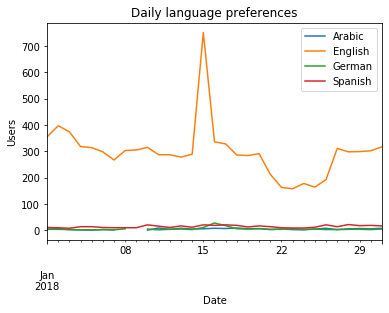

In [73]:
language.plot()
plt.title("Daily language preferences")
plt.xlabel("Date")
plt.ylabel("Users")
plt.legend(loc = "upper right", labels= language.columns.values)
plt.show()

In [77]:
language_age = data.groupby(["language_preferred","age_group"])["user_id"].count()
language_age = pd.DataFrame(language_age.unstack(level=1))
print(language_age.head().T)

language_preferred  Arabic  English  German  Spanish
age_group                                           
0-18 years              19     1421      31       68
19-24 years             26     1560      29       67
24-30 years             19     1442      35       72
30-36 years             19     1251      16       69
36-45 years             19     1260      19       55
45-55 years             21     1240      25       67
55+ years               22     1101      12       52


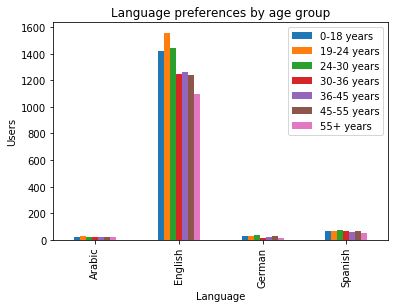

In [82]:
language_age.plot(kind="bar")
plt.title("Language preferences by age group")
plt.xlabel("Language")
plt.ylabel("Users")
plt.legend(loc = "upper right", labels= language_age.columns.values)
plt.show()

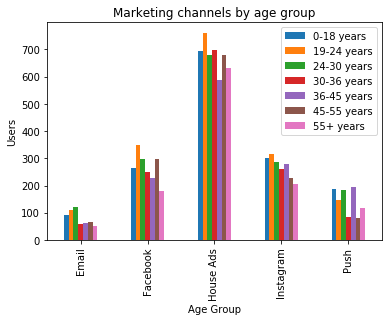

In [83]:
channel_age = data.groupby(['marketing_channel', 'age_group'])\
                                ['user_id'].count()

# Unstack channel_age and transform it into a DataFrame
channel_age_df = pd.DataFrame(channel_age.unstack(level = 1))

# Plot channel_age
channel_age_df.plot(kind = 'bar')
plt.title('Marketing channels by age group')
plt.xlabel('Age Group')
plt.ylabel('Users')
# Add a legend to the plot
plt.legend(loc = "upper right", labels = channel_age_df.columns.values)
plt.show()

In [87]:
retention_total = data.groupby(['date_subscribed',
                                     "subscribing_channel"])["user_id"].nunique()

# Print results
print(retention_total.head())


date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64


In [88]:
# Count the retained subs by subscribing channel and date subscribed
retention_subs = data[data['is_retained'] == True]\
                           .groupby(['date_subscribed',
                                     'subscribing_channel'])\
                            ['user_id'].nunique()

# Print results
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


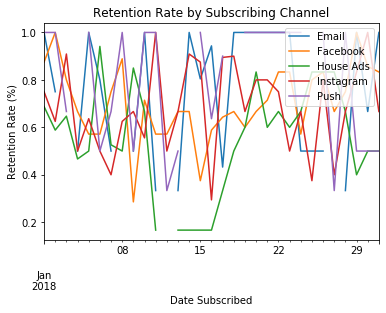

In [89]:
# Divide retained subscribers by total subscribers
retention_rate = retention_subs/retention_total
retention_rate_df = pd.DataFrame(retention_rate.unstack(level=1))

# Plot retention rate
retention_rate_df.plot()

# Add a title, x-label, y-label, legend and display the plot
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate (%)')
plt.legend(loc = 'upper right', 
           labels = retention_rate_df.columns.values)
plt.show()

## Yapılanları Fonksiyona Döküp İşlemleri Kolaylaştırma

In [104]:
def retention_rate(df, column_names):
    retained = df[df["is_retained"]==True]\
                        .groupby(column_names)["user_id"].nunique()
    
    converted = df[df["converted"]==True]\
                         .groupby(column_names)["user_id"].nunique()
    
    retention_rate = retained / converted
    
    return retention_rate

In [105]:
daily_retention = retention_rate(data,
                                ["date_subscribed","subscribing_channel"])

daily_retention = pd.DataFrame(daily_retention.unstack(level=1))
print(daily_retention.head())

subscribing_channel  Email  Facebook  House Ads  Instagram      Push
date_subscribed                                                     
2018-01-01            1.00  0.875000   0.687500   0.750000  1.000000
2018-01-02            0.75  1.000000   0.588235   0.625000  1.000000
2018-01-03             NaN  0.800000   0.647059   0.909091  0.666667
2018-01-04            1.00  0.666667   0.466667   0.500000       NaN
2018-01-05            1.00  0.571429   0.500000   0.636364  1.000000


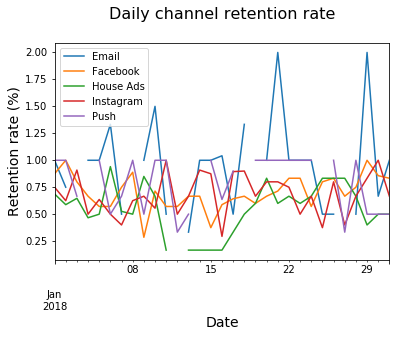

In [106]:
daily_retention.plot()
plt.title("Daily channel retention rate\n", size=16)
plt.ylabel("Retention rate (%)", size = 14)
plt.xlabel("Date",size=14)
plt.legend(loc = "upper left")
plt.show()

In [116]:
def plotting(df):
    for columns in df:
        plt.plot(df.index, df[columns])
        plt.title("Daily"  +  columns  +  "retention rate\n", size = 16)
        plt.ylabel("Retention rate (%)", size = 14)
        plt.xlabel("Date", size = 14)
        plt.show()

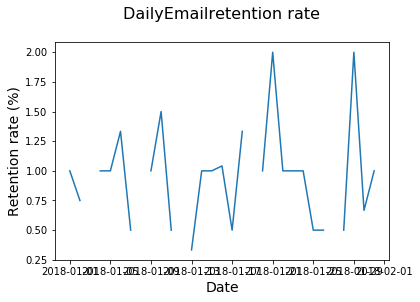

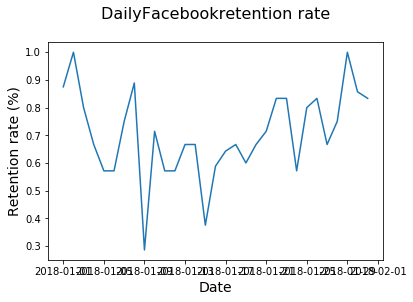

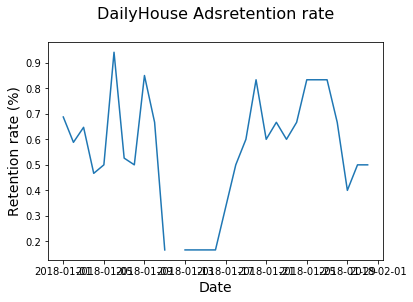

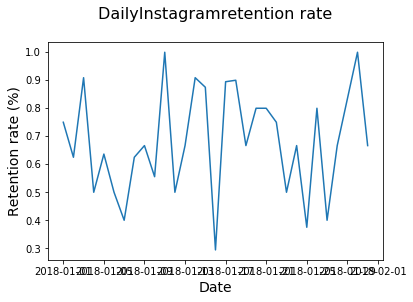

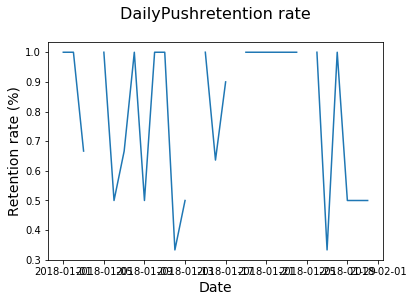

In [117]:
plotting(daily_retention)

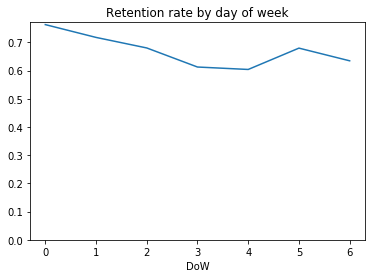

In [121]:
DoW_retention = retention_rate(data, ["DoW"])

DoW_retention.plot()
plt.title("Retention rate by day of week")
plt.ylim(0)
plt.show()

In [122]:
def conversion_rate(dataframe, column_names):
    column_conv = dataframe[dataframe['converted'] == True]\
                       .groupby(column_names)['user_id'].nunique()

    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    conversion_rate = column_conv/column_total
    
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

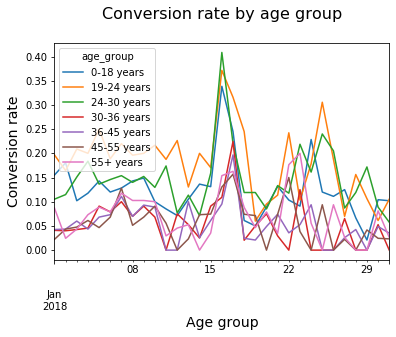

In [124]:
# Calculate conversion rate by age_group
age_group_conv = conversion_rate(data, ['date_served',
                                             'age_group'])

# Unstack and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level = 1))

# Visualize conversion by age_group
age_group_df.plot()
plt.title('Conversion rate by age group\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age group', size = 14)
plt.show()

In [125]:
def plotting_conv(dataframe):
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', 
                  size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        # Show plot
        plt.show()
        plt.clf()

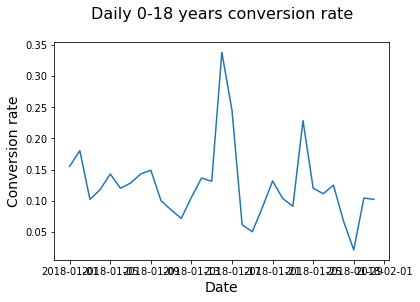

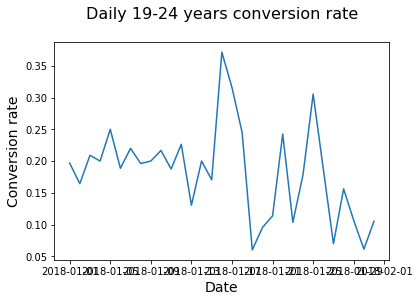

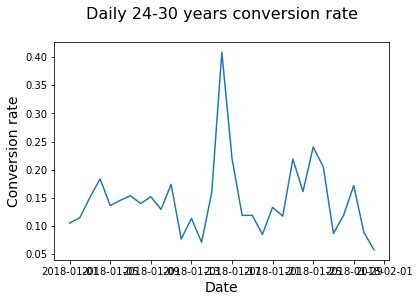

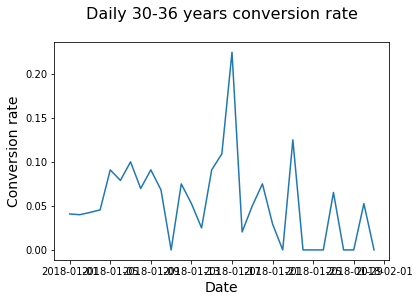

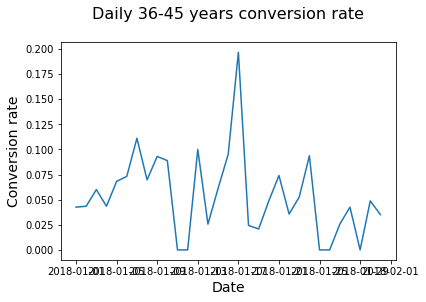

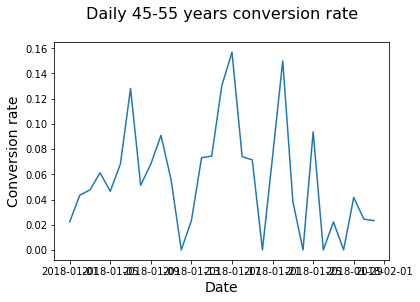

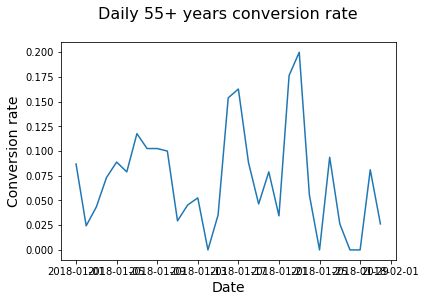

<Figure size 432x288 with 0 Axes>

In [126]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(data, 
                                 ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

In [127]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(data, ['date_served', 
                                                 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


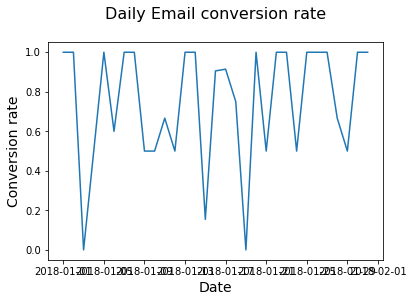

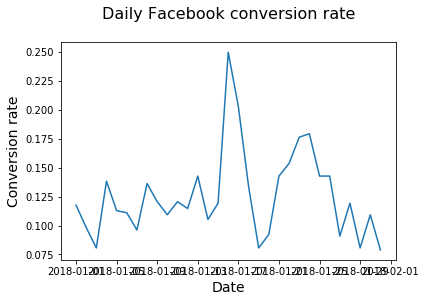

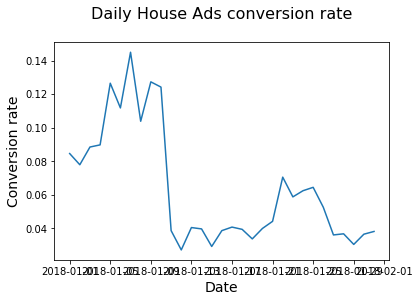

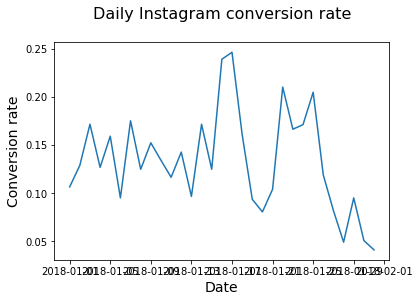

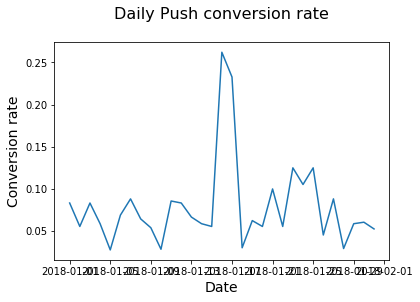

<Figure size 432x288 with 0 Axes>

In [128]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(data, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

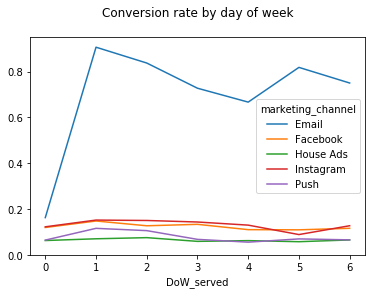

In [130]:
# Add day of week column to marketing
data['DoW_served'] = data['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(data, ['DoW_served', 
                                             'marketing_channel'])

# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

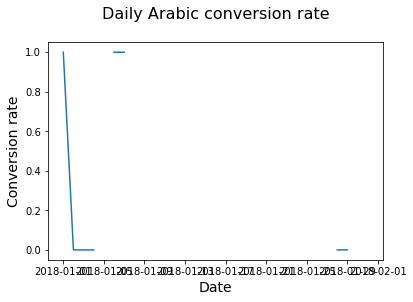

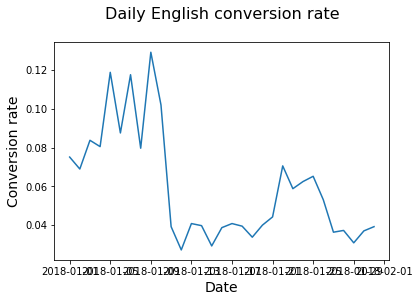

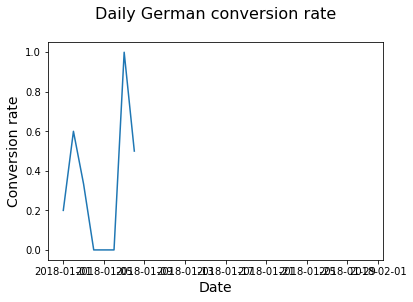

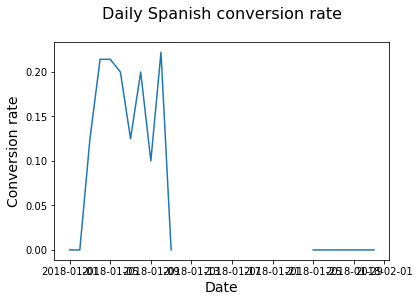

<Figure size 432x288 with 0 Axes>

In [131]:
# Isolate the rows where marketing channel is House Ads
house_ads = data[data['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads, 
                                    ['date_served', 
                                     'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

In [132]:
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_preferred'] == house_ads['language_displayed'], 
    'Yes', 
    'No')

# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


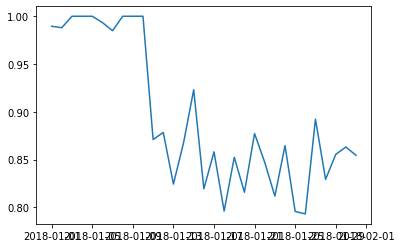

In [133]:
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.show()

In [134]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed']) 

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [148]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 
                          'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level=1))

In [149]:
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] = converted_df['english_conv_rate']*spanish_index
converted_df['expected_arabic_rate'] = converted_df['english_conv_rate']*arabic_index
converted_df['expected_german_rate'] = converted_df['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted_df['expected_german_conv'] = converted_df['expected_german_rate']/100*converted_df[('user_id','German')]

In [151]:
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum() + converted_df['expected_arabic_conv'].sum() + converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum() + converted_df[('converted','Arabic')].sum() + converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

32.144143192488265


## AB-TEST for Marketing

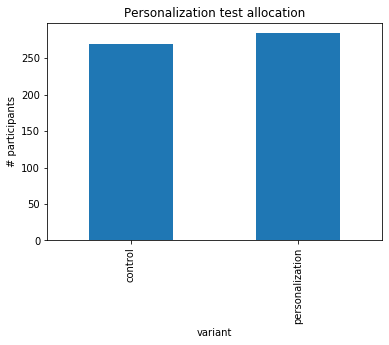

In [154]:
# Subset the DataFrame
email = data[data['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [155]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### Kontrol ve Onay testi

In [156]:
def lift(a,b):
    # Calcuate the mean of a and b 
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [162]:
from scipy import stats
def ab_segmentation(segment):
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(data[segment].values):
        print(subsegment)
      
      # Limit marketing to email and subsegment      
        email = data[(data['marketing_channel'] == 'Email') & (data[segment] == subsegment)]

        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
        control = subscribers['control'].dropna()
        personalization = subscribers['personalization'].dropna()

        print('lift:', lift(control, personalization))
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [163]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




In [164]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




We found that personalization was extremely effective for younger groups but less effective than the control for older groups. One explanation might be that younger users understand how their data might be used online and think personalization is cool because it gives them more insight into themselves while older people might feel that this is a violation of their privacy.